In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Liver Disease Prediction
- Liver diseases can be many like hepatitis, jaundice, liver cirrhosis, or even liver cancer(as it is commonly called but technically called Hepatocellular carcinoma)
- Most of the liver malfunctions, listed above are based on deviations of protein levels, bilirubin levels, protein and hormones that are tested in urine and blood. 
- Liver being very important organ, affects the performance of the gut and results in affecting the whole body.
- Given is the data of various patients and thir final status of liver disease
- It is seemingly observed that there might be connect between different aspects of data of patient and the result of his diagnosis.
- We are trying to develop a model that will be able to judge the result of diagnosis based on the parameters 

In [2]:
#Columns are Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,
#Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,AlbuminAlbumin and Globulin Ratio
#Last column is target variable, the result with 1 as patient with disease and 2 as patient without disease
data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",index_col=False, names=['Age','Gender','Total_bil','Direct_bil','ALP','ALT','AST','Ttl_Prtn','Albumin','Globulin','Result'])

In [3]:
data

,Age,Gender,Total_bil,Direct_bil,ALP,ALT,AST,Ttl_Prtn,Albumin,Globulin,Result
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Basic Checks

In [4]:
data.Result.value_counts() # Checking the counts of each class.

1    416
2    167
Name: Result, dtype: int64

In [5]:
len(data.Result) 
#It shows that the data is divided between the classes in 71-29 % which is not very imbalanced. 
#We'll proceed with normal balancing and try re-sampling if needed

583

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         583 non-null    int64  
 1   Gender      583 non-null    object 
 2   Total_bil   583 non-null    float64
 3   Direct_bil  583 non-null    float64
 4   ALP         583 non-null    int64  
 5   ALT         583 non-null    int64  
 6   AST         583 non-null    int64  
 7   Ttl_Prtn    583 non-null    float64
 8   Albumin     583 non-null    float64
 9   Globulin    579 non-null    float64
 10  Result      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.describe()
#The max values of most parameters are severly away from 75% percentile values, which means, there are huge outliers. 
#A study in google too confirms their status as outliers

,Age,Total_bil,Direct_bil,ALP,ALT,AST,Ttl_Prtn,Albumin,Globulin,Result
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data.isnull().sum()

Age           0
Gender        0
Total_bil     0
Direct_bil    0
ALP           0
ALT           0
AST           0
Ttl_Prtn      0
Albumin       0
Globulin      4
Result        0
dtype: int64

In [9]:
data.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

## Data Cleaning and Preprocessing, with EDA

### Data Cleaning

In [10]:
data.loc[data.Globulin.isnull()]

,Age,Gender,Total_bil,Direct_bil,ALP,ALT,AST,Ttl_Prtn,Albumin,Globulin,Result
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


(array([ 58., 101., 245.,  92.,  60.,  14.,   6.,   0.,   2.,   1.]),
 array([0.3 , 0.55, 0.8 , 1.05, 1.3 , 1.55, 1.8 , 2.05, 2.3 , 2.55, 2.8 ]),
 <BarContainer object of 10 artists>)

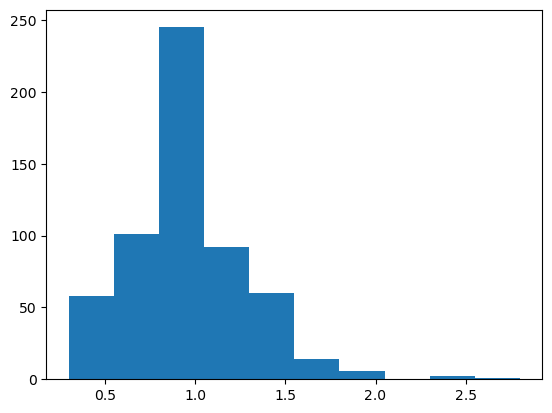

In [11]:
#There are four rows with null values of globulin. Let us observe its distribution and then choose to replace it with mean or median
plt.hist(data.Globulin)

<AxesSubplot:xlabel='Globulin', ylabel='Density'>

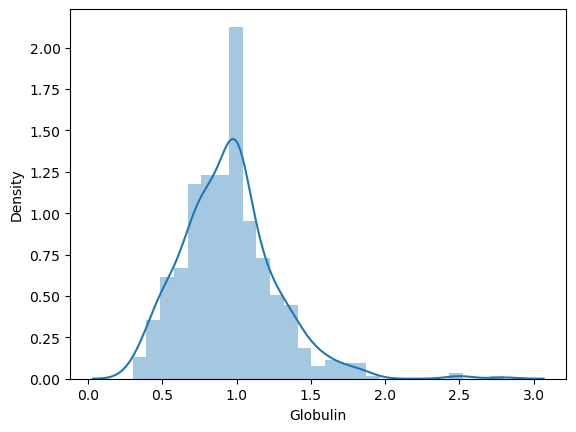

In [12]:
import seaborn as sns
sns.distplot(data.Globulin)

<AxesSubplot:xlabel='Globulin'>

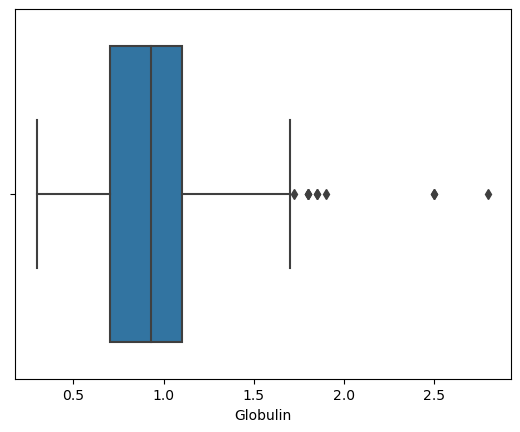

In [13]:
sns.boxplot(data.Globulin)

- From the box plot, hist plot and dist plot, it is evident that Globulin values have a normal distribution with no significant skew, hence the null values can be replaced with the mean.

In [14]:
data.loc[data.Globulin.isnull(),'Globulin'] = np.mean(data.Globulin)

In [15]:
data.loc[data.Globulin.isnull()] #Rechecking if any null values exist.

,Age,Gender,Total_bil,Direct_bil,ALP,ALT,AST,Ttl_Prtn,Albumin,Globulin,Result


### EDA - Univariate and Bivariate analysis
- This data will require univariate analysis as there are outliers.
- They must be fixed first as a part of cleaning too. 
- Bivariate analysis can be made with hue as the categorical variables, to understand their categorical spread.

In [16]:
count_col = ['Gender','Result']
cont_col = ['Total_bil','Direct_bil','ALP','ALT','AST','Ttl_Prtn','Albumin','Globulin']

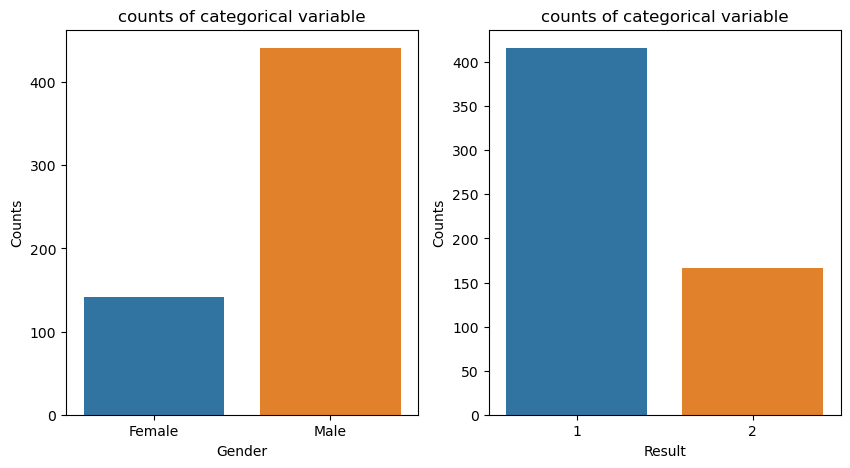

In [17]:
plt.figure(figsize=(10,5))
plt_num = 1
for i in count_col:
    plt.subplot(1,2,plt_num)
    sns.countplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt_num += 1
    plt.title('counts of categorical variable')
plt.show()
#The data consists more males than females and more affected ppl than the unaffected

<AxesSubplot:xlabel='Result', ylabel='count'>

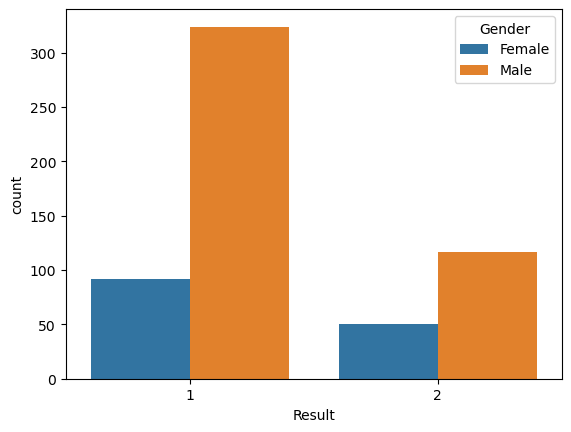

In [18]:
sns.countplot(data.Result, hue=data.Gender)
#Most of the affected ones are males.

<AxesSubplot:xlabel='Age', ylabel='Count'>

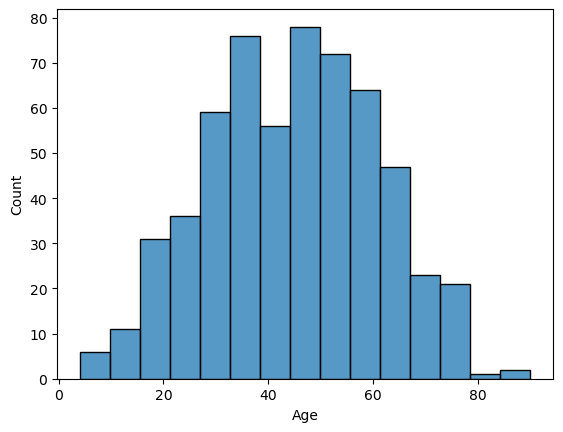

In [19]:
sns.histplot(data.Age)

In [20]:
np.mean(data.Age)
#The age of patients is a normal distribution with average age of 45 years

44.74614065180103

<AxesSubplot:xlabel='Age', ylabel='Count'>

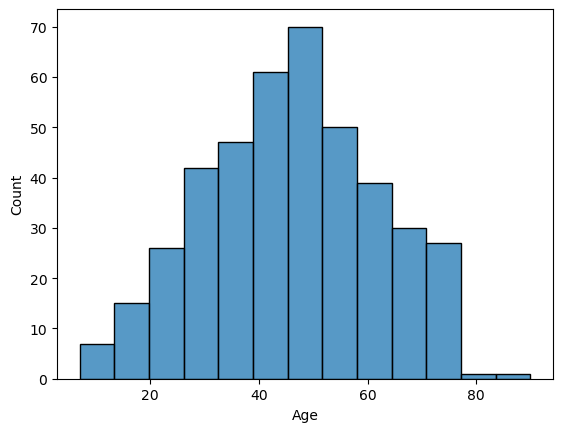

In [21]:
sns.histplot(data.loc[data.Result==1,'Age'])

In [22]:
np.mean(data.loc[data.Result==1,'Age'])
#The age of people diagnosed with liver cancer is also a normal distribution with an average age of 46 years

46.15384615384615

<AxesSubplot:xlabel='Age', ylabel='Count'>

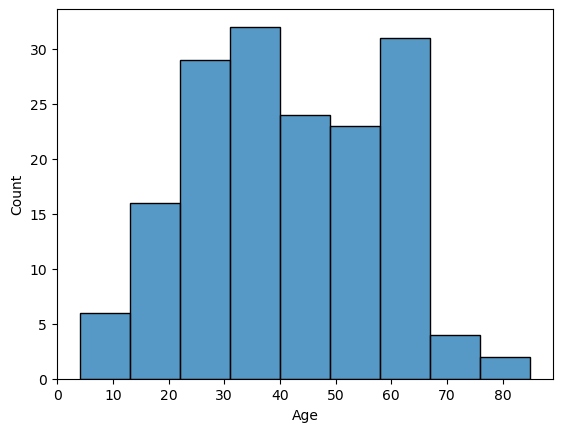

In [23]:
sns.histplot(data.loc[data.Result==2,'Age'])

In [24]:
np.mean(data.loc[data.Result==2,'Age'])
#The age of people diagnosed no cancer is also a normal distribution with an average age of 41 years

41.23952095808383

<AxesSubplot:xlabel='Age', ylabel='Count'>

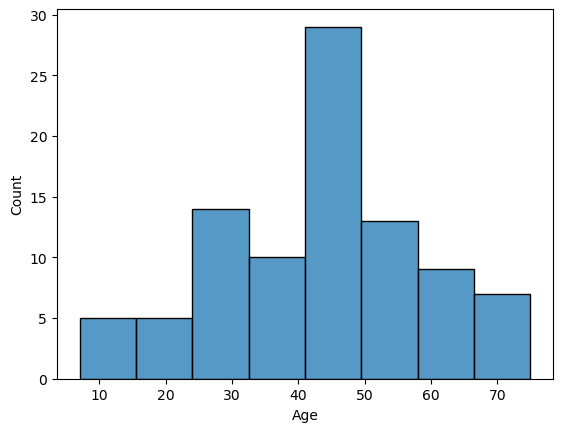

In [25]:
#Age study of males and females of diagnosed with and without cancer
sns.histplot(data.loc[((data.Result==1)&(data.Gender=='Female')),'Age'])

In [26]:
np.mean(data.loc[((data.Result==1)&(data.Gender=='Female')),'Age'])

43.34782608695652

<AxesSubplot:xlabel='Age', ylabel='Count'>

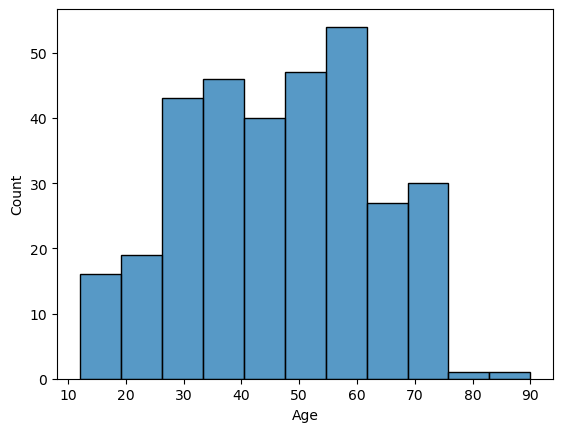

In [27]:
sns.histplot(data.loc[((data.Result==1)&(data.Gender=='Male')),'Age'])

In [28]:
np.mean(data.loc[((data.Result==1)&(data.Gender=='Male')),'Age'])

46.95061728395062

<AxesSubplot:xlabel='Age', ylabel='Count'>

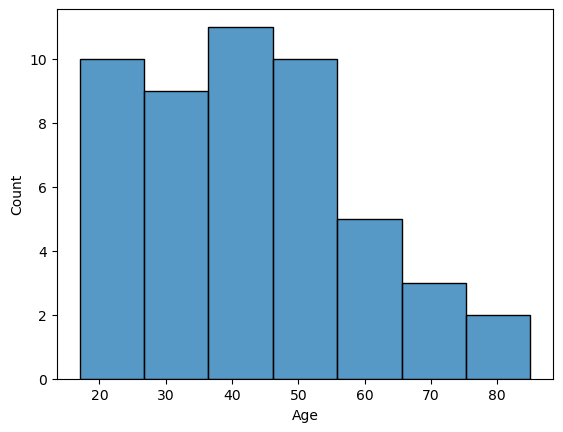

In [29]:
sns.histplot(data.loc[((data.Result==2)&(data.Gender=='Female')),'Age'])

In [30]:
np.mean(data.loc[((data.Result==2)&(data.Gender=='Female')),'Age'])

42.74

<AxesSubplot:xlabel='Age', ylabel='Count'>

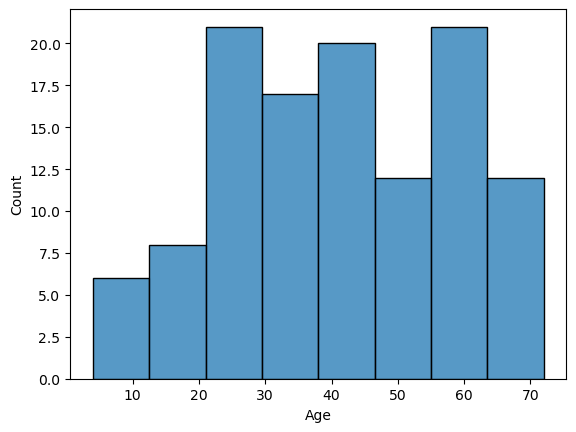

In [31]:
sns.histplot(data.loc[((data.Result==2)&(data.Gender=='Male')),'Age'])

In [32]:
np.mean(data.loc[((data.Result==2)&(data.Gender=='Male')),'Age'])

40.598290598290596

- Average age of cancer diagnosed female is 43, while that of cancer diagnosed male is 47. 
- Average age of non cancer female is 43 while that of male is 41. 
- So in males, as age progresses, higher chance of liver cancer.

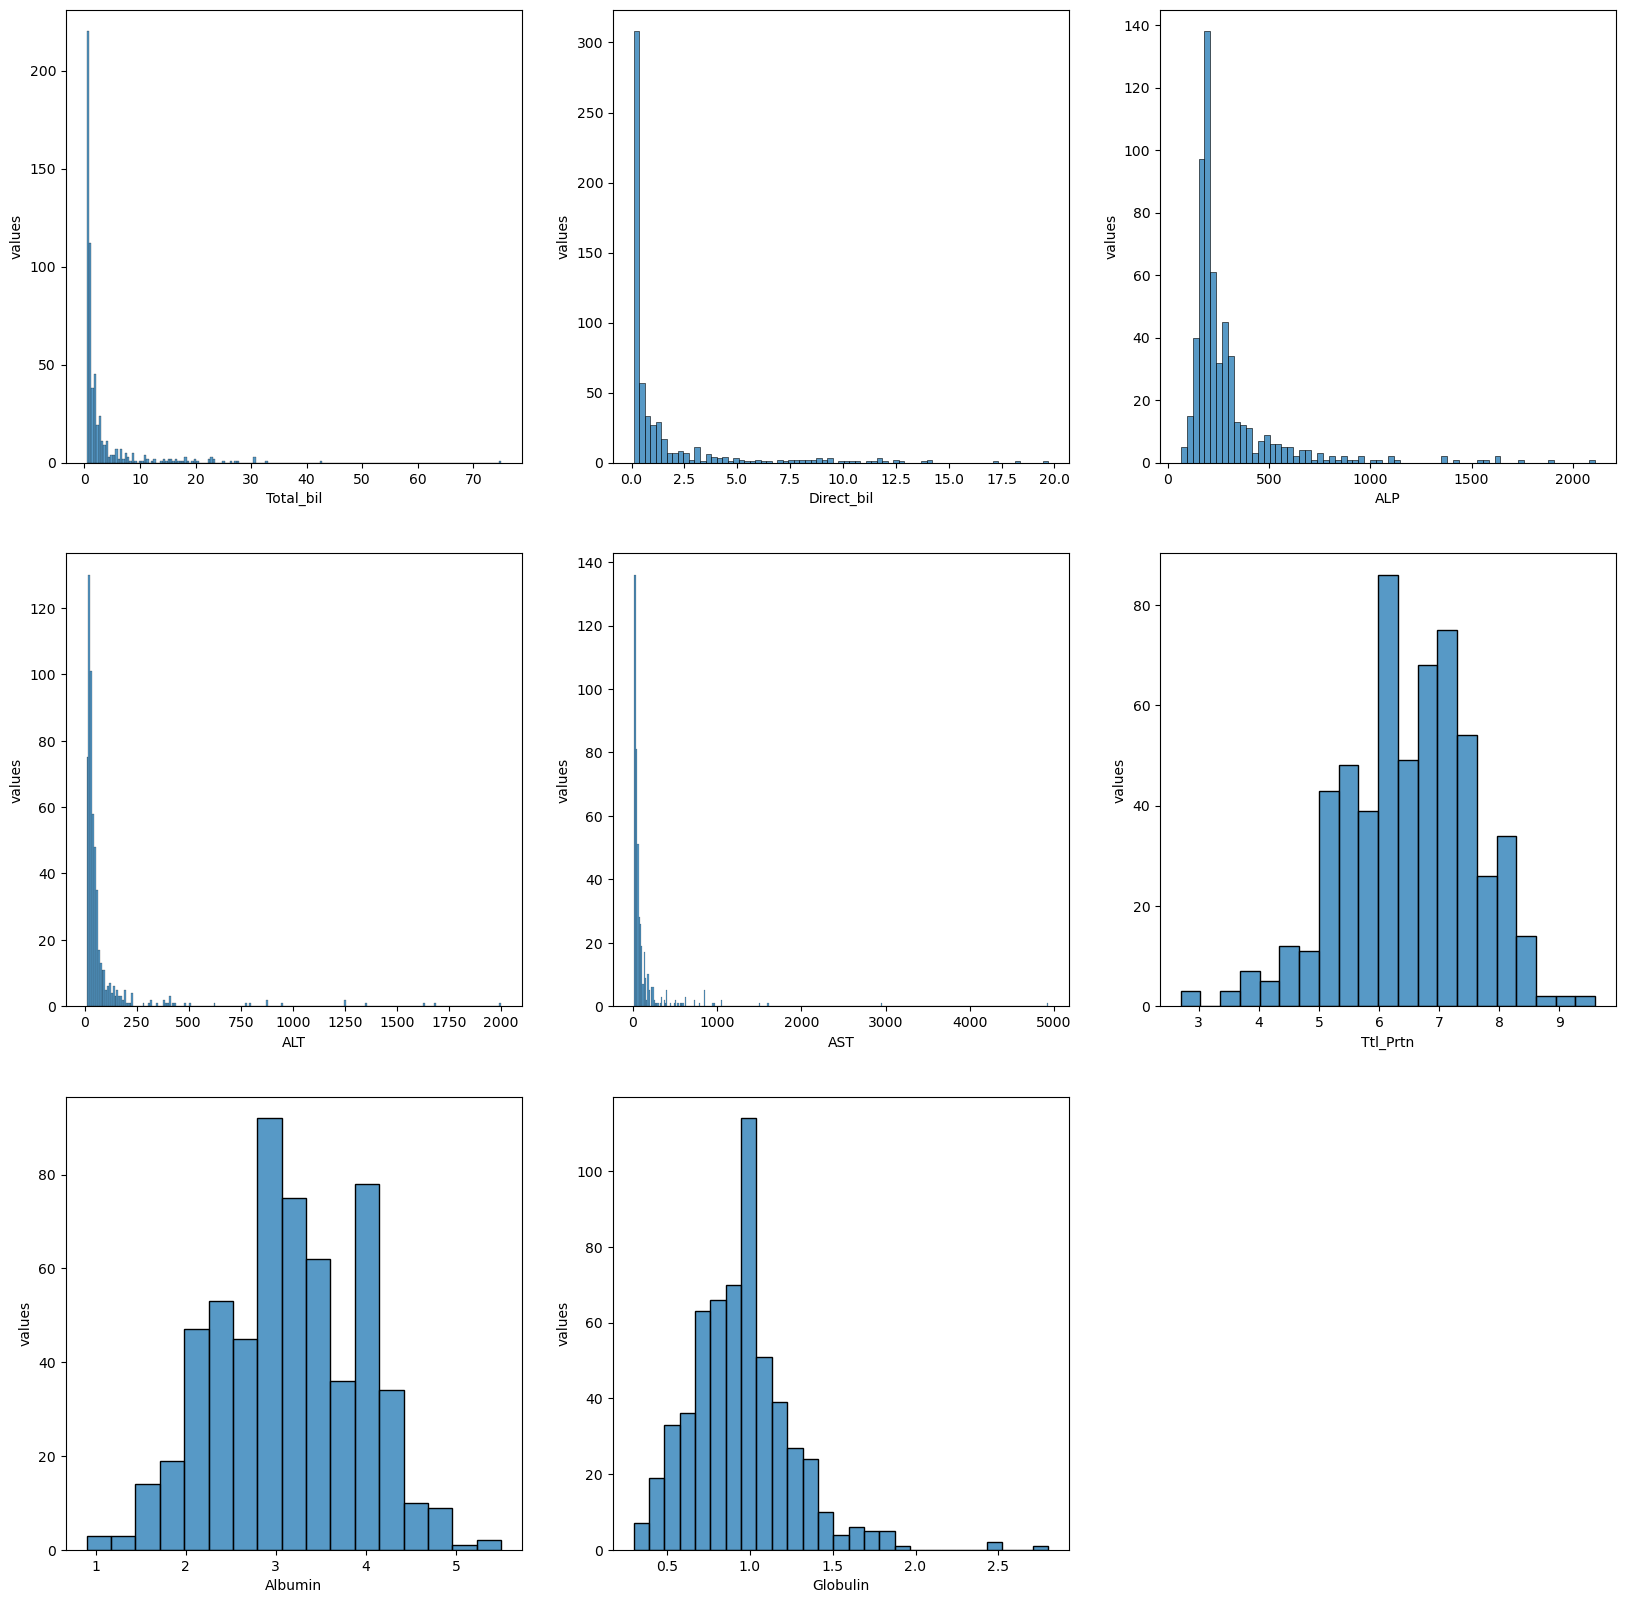

In [33]:
plt.figure(figsize = (20,20))
plt_num = 1
for i in cont_col:
    plt.subplot(3,3,plt_num)
    sns.histplot(data[i])
    plt.xlabel(i)
    plt.ylabel('values')
    plt_num+=1
plt.show()
#They seem to be normal or close to normal distributions with lot of outliers. 
#To filter outliers, we have to analyse their box plots.

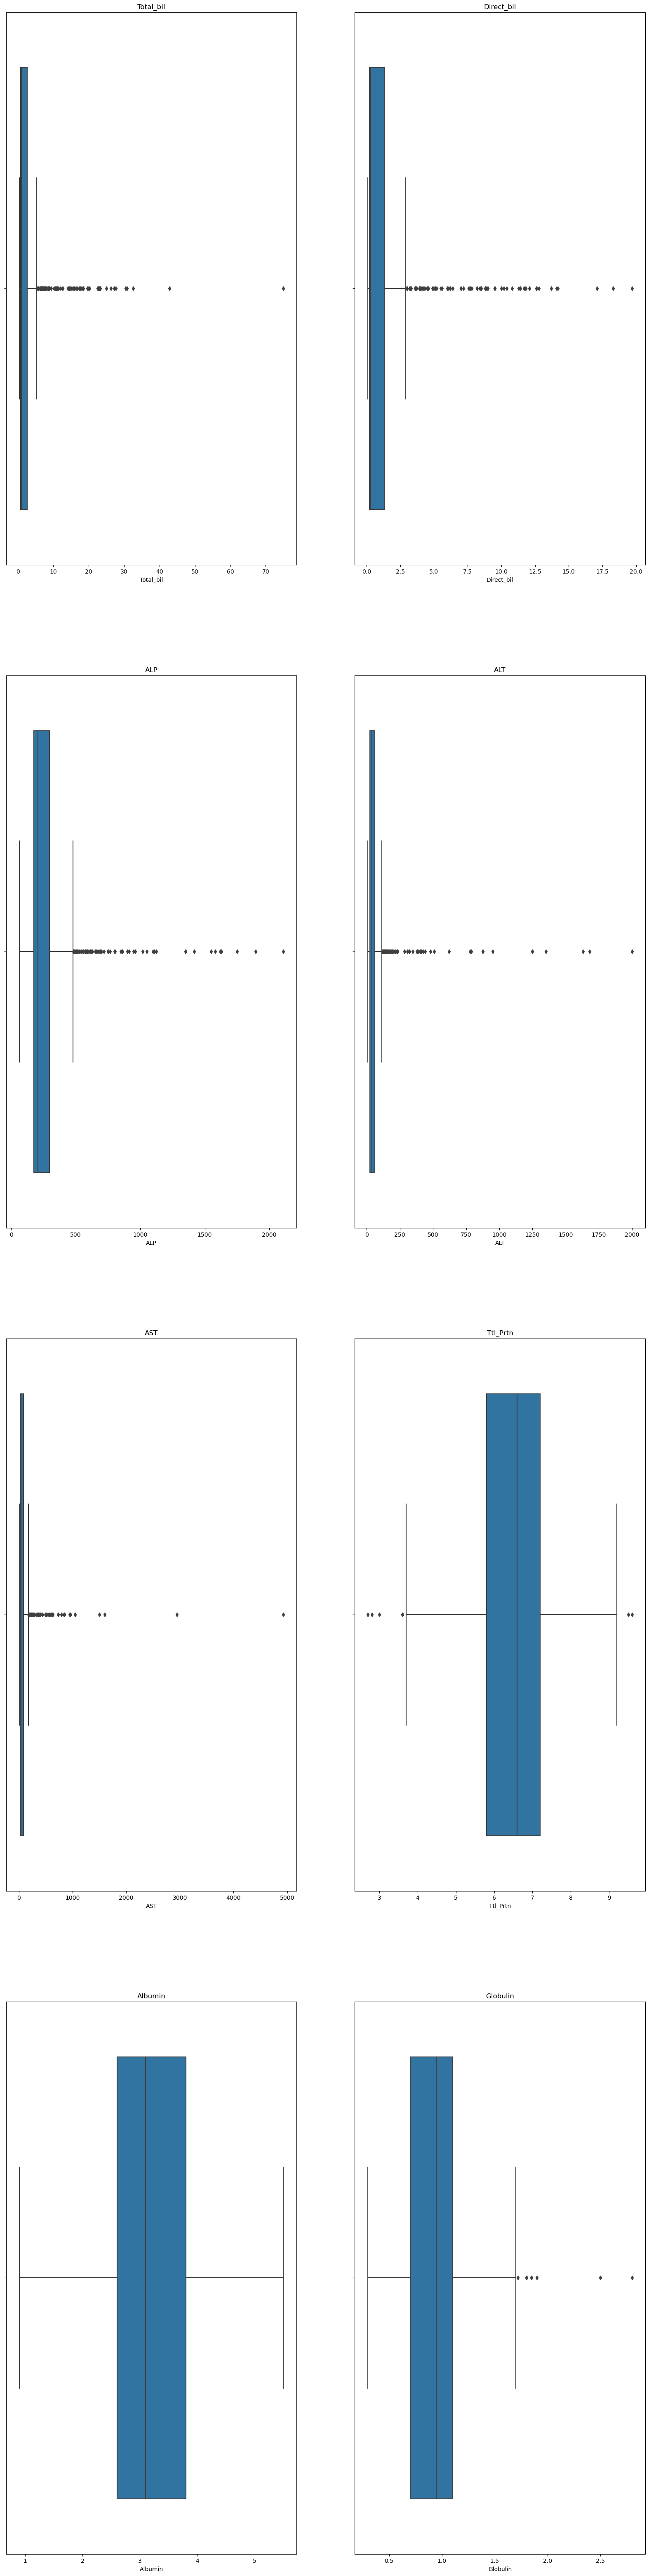

In [34]:
plt.figure(figsize=(20,80))
plt_num = 1
for i in cont_col:
    plt.subplot(4,2,plt_num)
    sns.boxplot(data[i])
    plt.title(i)
    plt_num+=1
plt.show()

- Total bilirubin : Normal range: 1.7-20.5. Liver infected people will have more of it upto >100. 
- Direct bilirubin value: Normal range: 0-5, but for infected patients it'll go till 20
- Alkaline Phosphotase (ALP) is also possible to rise beyond 1000 in liver cancer patients
- Alamine Aminotransferase (ALT) is also possible to rise beyond 250 in liver issue
- Aspartate Aminotransferase(AST) is also possible to rise beyond 1000, though its range is 10-36.
- Total proteins value can be from 6-8, but for liver infected, it'll be high
- Globulin 1.1-2.5 is considered normal,but lesser values are found for liver patients.
- In this regard, none of our outliers are considered outliers, as they are the values present in liver patients. 
- If we replace them with mean, we are replacing them with normal values, which entirely fails the purpose.
- So none of the data are outliers

## Conclusions from EDA:
- The data consists more males than females and more affected ppl than the unaffected
- Most of the affected ones are males.
- The age of patients is a normal distribution with average age of 45 years
- Average age of cancer diagnosed female is 43, while that of cancer diagnosed male is 47. 
- Average age of non cancer female is 43 while that of male is 41. 
- So in males, as age progresses, higher chance of liver cancer.
- none of our outliers are considered outliers, as they are the values present in liver patients. 
- If we replace them with mean, we are replacing them with normal values, which entirely fails the purpose.

### Feature Selection

In [35]:
data.corr()

,Age,Total_bil,Direct_bil,ALP,ALT,AST,Ttl_Prtn,Albumin,Globulin,Result
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_bil,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_bil,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
ALP,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
ALT,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
AST,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Ttl_Prtn,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Globulin,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Result,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


<AxesSubplot:>

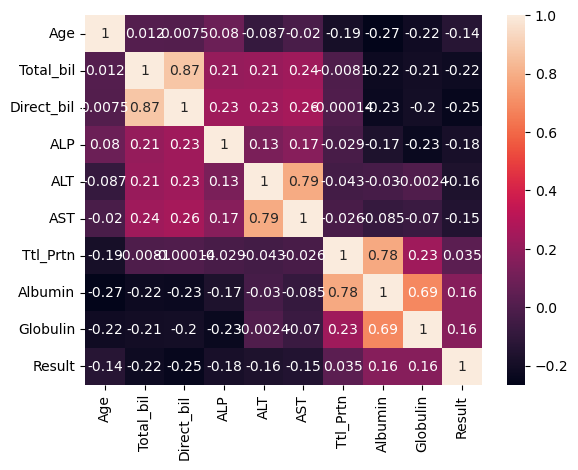

In [36]:
sns.heatmap(data.corr(),annot=True)

In [37]:
df_temp =pd.DataFrame([data.Ttl_Prtn,data.Albumin,data.Globulin]).transpose()
df_temp['A/G_ratio'] = data.Albumin/data.Globulin
df_temp['A+G'] = data.Albumin+data.Globulin
df_temp['TP-A'] = data.Ttl_Prtn - data.Albumin
df_temp

,Ttl_Prtn,Albumin,Globulin,A/G_ratio,A+G,TP-A
0,6.8,3.3,0.90,3.666667,4.20,3.5
1,7.5,3.2,0.74,4.324324,3.94,4.3
2,7.0,3.3,0.89,3.707865,4.19,3.7
3,6.8,3.4,1.00,3.400000,4.40,3.4
4,7.3,2.4,0.40,6.000000,2.80,4.9
...,...,...,...,...,...,...
578,5.9,1.6,0.37,4.324324,1.97,4.3
579,6.0,3.2,1.10,2.909091,4.30,2.8
580,6.4,3.2,1.00,3.200000,4.20,3.2
581,6.8,3.4,1.00,3.400000,4.40,3.4


<AxesSubplot:>

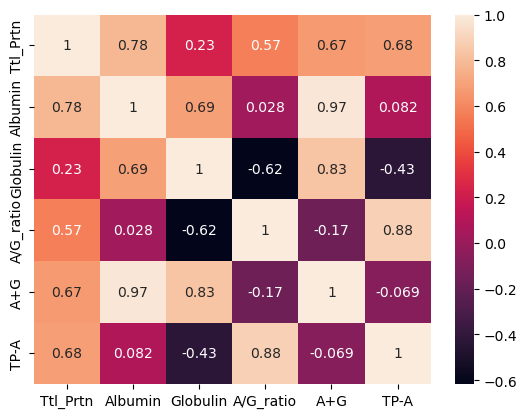

In [38]:
sns.heatmap(df_temp.corr(),annot=True)

### Insights from correlation:
- The correlation heat map shows high correlation between 
    - total bilirubin and direct bilirubin
    - ALT and AST
    - Total protein and albumin
    - Albumin and globulin
- It makes sense that direct bilirubin is a part of total bilirubin and hence they're correlated. Of these, direct bilirubin makes more sense as connected to liver disease, since indirect bilirubin is connected to anemia and is not relevant with liver malfunctioning.(Ref: Google). Hence we consider direct bilirubin and eliminate total bilirubin in our final features. 
- While high AST levels mean there may be tissue injury, it doesn't always relate to the liver. By contrast, alanine aminotransferase (ALT) is found mainly in the liver. Additionally its the ratio of ast/alt that is significant in identifying liver cancer. Hence we will take ast/alt as a feature than individual terms so that both are included and that the effective usage of the values are made. 
- Total proteins are sum of albumin and globulin and other minor proteins. And lower Albumin/globulin ratio is connected with liver diseases. In this regard, observing the correlation between total protein, albumin and globulin, and their ratios, we see that total protein and albumin are highly correlated and globulin and albumin are somewhat correlated.
- Hence total_protien and Albumin/Globulin ratio are important considerations and will be made part of final features.
- Our final features will hence include direct bilirubin, AST/ALT, total protein and Albumin/Globulin, along with Age, Gender, ALP. Our target remains the result

### Feature Selection - Processing

In [39]:
data.columns

Index(['Age', 'Gender', 'Total_bil', 'Direct_bil', 'ALP', 'ALT', 'AST',
       'Ttl_Prtn', 'Albumin', 'Globulin', 'Result'],
      dtype='object')

In [40]:
temp = data.drop(['Total_bil','ALT', 'AST', 'Albumin', 'Globulin','Result'],axis=1)
y = data.Result
temp['AST/ALT'] = data.AST/data.ALT
temp['A/G'] = data.Albumin/data.Globulin

In [41]:
temp

,Age,Gender,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G
0,65,Female,0.1,187,6.8,1.125000,3.666667
1,62,Male,5.5,699,7.5,1.562500,4.324324
2,62,Male,4.1,490,7.0,1.133333,3.707865
3,58,Male,0.4,182,6.8,1.428571,3.400000
4,72,Male,2.0,195,7.3,2.185185,6.000000
...,...,...,...,...,...,...,...
578,60,Male,0.1,500,5.9,1.700000,4.324324
579,40,Male,0.1,98,6.0,0.885714,2.909091
580,52,Male,0.2,245,6.4,1.020833,3.200000
581,31,Male,0.5,184,6.8,1.103448,3.400000


### Encoding the gender column by one hot encoding

In [42]:
#Since the gender column or its values are not ordinal, we employ one hot encoding
temp['Male'] = pd.get_dummies(temp['Gender'])['Male']
temp['Female'] = pd.get_dummies(temp['Gender'])['Female']
temp.drop('Gender',axis=1,inplace=True)

In [43]:
#Onehot encoding froms scikit learn, but the column names will be 0&1. Dummies function of pandas is easiest
#from sklearn.preprocessing import OneHotEncoder
#ohenc = OneHotEncoder()
#temp = pd.DataFrame(ohenc.fit_transform(x[['Gender']]).toarray())

In [44]:
temp

,Age,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G,Male,Female
0,65,0.1,187,6.8,1.125000,3.666667,0,1
1,62,5.5,699,7.5,1.562500,4.324324,1,0
2,62,4.1,490,7.0,1.133333,3.707865,1,0
3,58,0.4,182,6.8,1.428571,3.400000,1,0
4,72,2.0,195,7.3,2.185185,6.000000,1,0
...,...,...,...,...,...,...,...,...
578,60,0.1,500,5.9,1.700000,4.324324,1,0
579,40,0.1,98,6.0,0.885714,2.909091,1,0
580,52,0.2,245,6.4,1.020833,3.200000,1,0
581,31,0.5,184,6.8,1.103448,3.400000,1,0


### Scaling the data to ensure range of all features is the same.
- Observing the distributions to ensure if the scaling has to be normal or standard

In [45]:
temp.columns

Index(['Age', 'Direct_bil', 'ALP', 'Ttl_Prtn', 'AST/ALT', 'A/G', 'Male',
       'Female'],
      dtype='object')

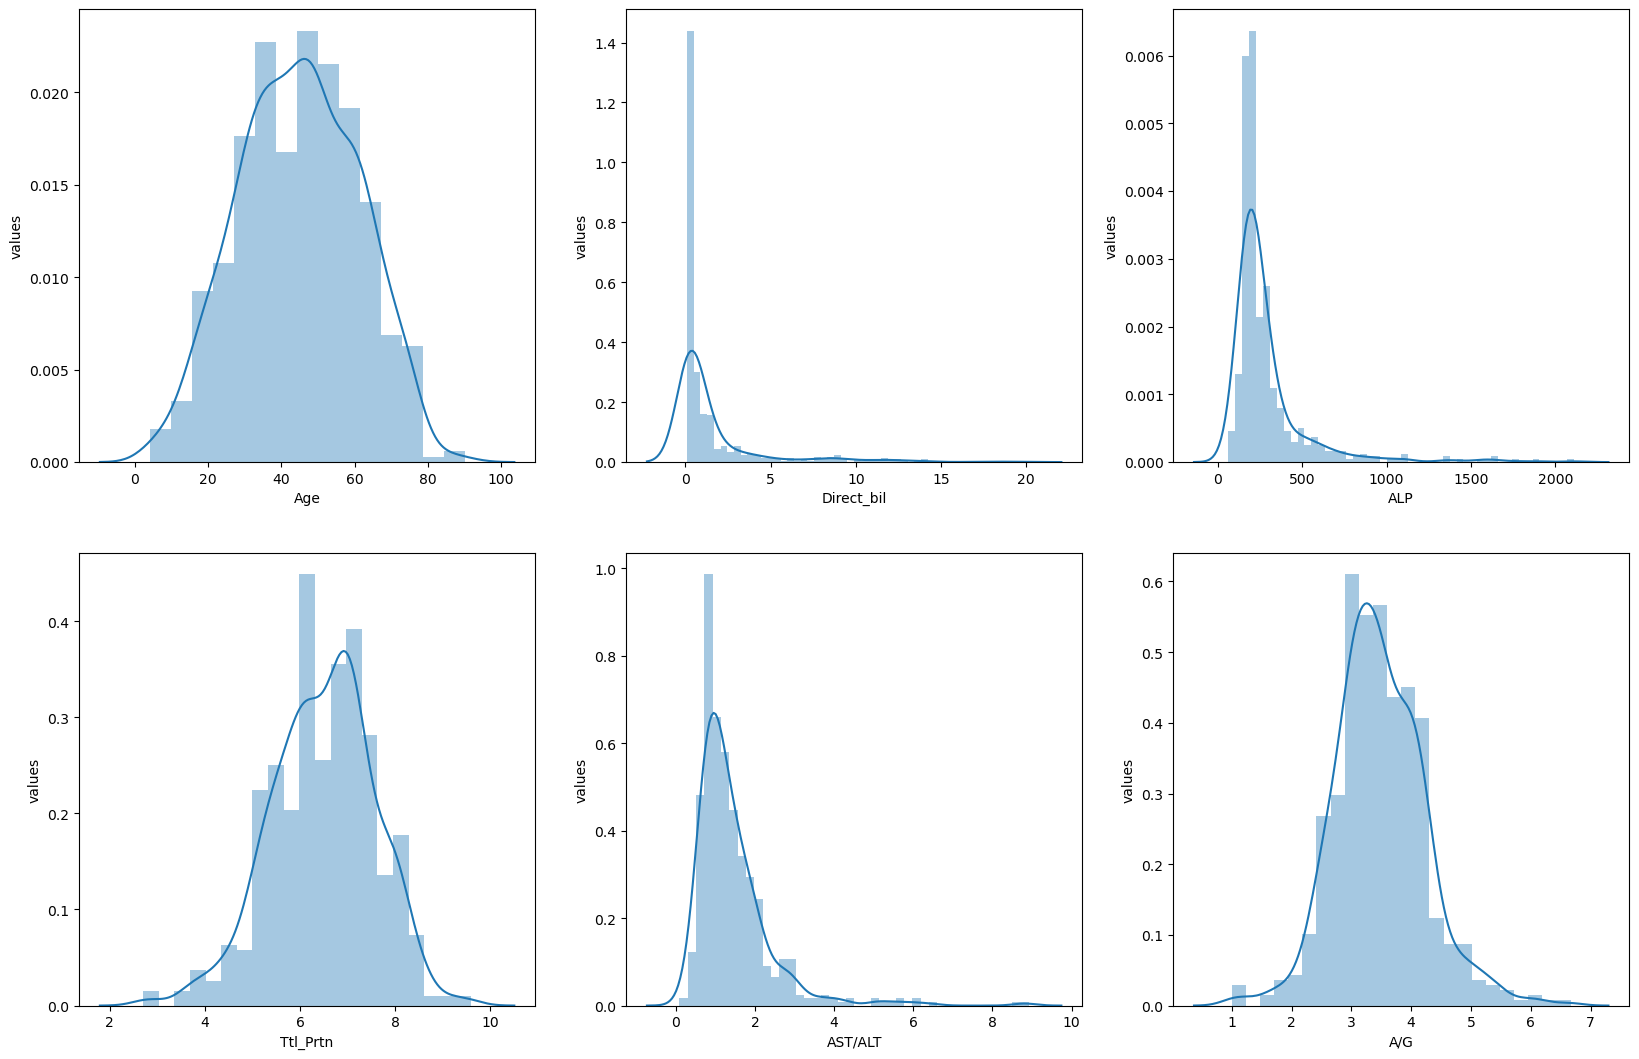

In [46]:
plt.figure(figsize = (20,20))
plt_num = 1
for i in ['Age', 'Direct_bil', 'ALP', 'Ttl_Prtn', 'AST/ALT', 'A/G']:
    plt.subplot(3,3,plt_num)
    sns.distplot(temp[i])
    plt.xlabel(i)
    plt.ylabel('values')
    plt_num+=1
plt.show()

In [47]:
#The distributions are close to normal distributions, but applying normal distribution will give negative values
#Having negative values will not let us use Naive Bayes, which is one good binary classification algorithm
#So we switch to MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_temp = temp[['Age', 'Direct_bil', 'ALP', 'Ttl_Prtn', 'AST/ALT', 'A/G']]
x_scaled = pd.DataFrame(MMS.fit_transform(x_temp[['Age', 'Direct_bil', 'ALP', 'Ttl_Prtn', 'AST/ALT','A/G']]),columns=x_temp.columns)
x_scaled

,Age,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G
0,0.709302,0.000000,0.060576,0.594203,0.117179,0.470588
1,0.674419,0.275510,0.310699,0.695652,0.166708,0.586645
2,0.674419,0.204082,0.208598,0.623188,0.118122,0.477859
3,0.627907,0.015306,0.058134,0.594203,0.151546,0.423529
4,0.790698,0.096939,0.064485,0.666667,0.237202,0.882353
...,...,...,...,...,...,...
578,0.651163,0.000000,0.213483,0.463768,0.182274,0.586645
579,0.418605,0.000000,0.017098,0.478261,0.090089,0.336898
580,0.558140,0.005102,0.088911,0.536232,0.105386,0.388235
581,0.313953,0.020408,0.059111,0.594203,0.114739,0.423529


In [48]:
temp.drop(['Age', 'Direct_bil', 'ALP', 'Ttl_Prtn', 'AST/ALT', 'A/G'],axis=1,inplace=True)
temp

,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
578,1,0
579,1,0
580,1,0
581,1,0


In [49]:
temp['Age'] = x_scaled['Age']
temp['Direct_bil'] = x_scaled['Direct_bil']
temp['ALP'] = x_scaled['ALP']
temp['Ttl_Prtn'] = x_scaled['Ttl_Prtn']
temp['AST/ALT'] = x_scaled['AST/ALT']
temp['A/G'] = x_scaled['A/G']
temp

,Male,Female,Age,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G
0,0,1,0.709302,0.000000,0.060576,0.594203,0.117179,0.470588
1,1,0,0.674419,0.275510,0.310699,0.695652,0.166708,0.586645
2,1,0,0.674419,0.204082,0.208598,0.623188,0.118122,0.477859
3,1,0,0.627907,0.015306,0.058134,0.594203,0.151546,0.423529
4,1,0,0.790698,0.096939,0.064485,0.666667,0.237202,0.882353
...,...,...,...,...,...,...,...,...
578,1,0,0.651163,0.000000,0.213483,0.463768,0.182274,0.586645
579,1,0,0.418605,0.000000,0.017098,0.478261,0.090089,0.336898
580,1,0,0.558140,0.005102,0.088911,0.536232,0.105386,0.388235
581,1,0,0.313953,0.020408,0.059111,0.594203,0.114739,0.423529


### Modeling:
#### We will use Logistic Regression, KNN, Naive Bayes, SVM, Decision Tree, RF Classifier, XGB Classifier with hyper parameter tuning wherever possible.

In [50]:
x = temp

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [52]:
len(x_train)

437

In [53]:
len(x_test)

146

#### Logistic Regression

In [54]:
Results = pd.DataFrame(index=['Accuracy','Precision','Recall','F1'])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.7465753424657534 
Precision:  0.75 
Recall Score 0.9908256880733946 
F1 Score 0.8537549407114624 
Confusion Matrix
 [[108   1]
 [ 36   1]]
              precision    recall  f1-score   support

           1       0.75      0.99      0.85       109
           2       0.50      0.03      0.05        37

    accuracy                           0.75       146
   macro avg       0.62      0.51      0.45       146
weighted avg       0.69      0.75      0.65       146



#### KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.678082191780822 
Precision:  0.7980769230769231 
Recall Score 0.7614678899082569 
F1 Score 0.7793427230046949 
Confusion Matrix
 [[83 26]
 [21 16]]
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       109
           2       0.38      0.43      0.41        37

    accuracy                           0.68       146
   macro avg       0.59      0.60      0.59       146
weighted avg       0.69      0.68      0.68       146



#### Naive Bayes Classifer:

In [57]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()  #Creating instance
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['NB w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.7465753424657534 
Precision:  0.7465753424657534 
Recall Score 1.0 
F1 Score 0.8549019607843137 
Confusion Matrix
 [[109   0]
 [ 37   0]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.85       109
           2       0.00      0.00      0.00        37

    accuracy                           0.75       146
   macro avg       0.37      0.50      0.43       146
weighted avg       0.56      0.75      0.64       146



#### Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['DT w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.6027397260273972 
Precision:  0.7684210526315789 
Recall Score 0.6697247706422018 
F1 Score 0.7156862745098038 
Confusion Matrix
 [[73 36]
 [22 15]]
              precision    recall  f1-score   support

           1       0.77      0.67      0.72       109
           2       0.29      0.41      0.34        37

    accuracy                           0.60       146
   macro avg       0.53      0.54      0.53       146
weighted avg       0.65      0.60      0.62       146



#### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.7123287671232876 
Precision:  0.7815126050420168 
Recall Score 0.8532110091743119 
F1 Score 0.8157894736842106 
Confusion Matrix
 [[93 16]
 [26 11]]
              precision    recall  f1-score   support

           1       0.78      0.85      0.82       109
           2       0.41      0.30      0.34        37

    accuracy                           0.71       146
   macro avg       0.59      0.58      0.58       146
weighted avg       0.69      0.71      0.70       146



#### Support Vector Classifier

In [60]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['SVM w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.7465753424657534 
Precision:  0.7465753424657534 
Recall Score 1.0 
F1 Score 0.8549019607843137 
Confusion Matrix
 [[109   0]
 [ 37   0]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.85       109
           2       0.00      0.00      0.00        37

    accuracy                           0.75       146
   macro avg       0.37      0.50      0.43       146
weighted avg       0.56      0.75      0.64       146



#### Bagging with KNN as base

In [61]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=20)
model_bagg.fit(x_train,y_train)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN Bagging w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.678082191780822 
Precision:  0.7980769230769231 
Recall Score 0.7614678899082569 
F1 Score 0.7793427230046949 
Confusion Matrix
 [[83 26]
 [21 16]]
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       109
           2       0.38      0.43      0.41        37

    accuracy                           0.68       146
   macro avg       0.59      0.60      0.59       146
weighted avg       0.69      0.68      0.68       146



#### Bagging with RF as base

In [62]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=rf_clf,n_estimators=20)
model_bagg.fit(x_train,y_train)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF Bagging w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.7671232876712328 
Precision:  0.7906976744186046 
Recall Score 0.9357798165137615 
F1 Score 0.8571428571428571 
Confusion Matrix
 [[102   7]
 [ 27  10]]
              precision    recall  f1-score   support

           1       0.79      0.94      0.86       109
           2       0.59      0.27      0.37        37

    accuracy                           0.77       146
   macro avg       0.69      0.60      0.61       146
weighted avg       0.74      0.77      0.73       146



#### Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() 
gbm.fit(x_train,y_train)
y_pred=gbm.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['GB w/o databalancing'] = [acc,pr,re,f1]

Accuracy:  0.7123287671232876 
Precision:  0.8018018018018018 
Recall Score 0.8165137614678899 
F1 Score 0.8090909090909092 
Confusion Matrix
 [[89 20]
 [22 15]]
              precision    recall  f1-score   support

           1       0.80      0.82      0.81       109
           2       0.43      0.41      0.42        37

    accuracy                           0.71       146
   macro avg       0.62      0.61      0.61       146
weighted avg       0.71      0.71      0.71       146



### Conclusion:  The data imbalance had an effect on model performance. 
### We'll fix it with resampling and then apply the models

### Minority resampling applied

In [64]:
#Using the scaled and encoded data, joining the result column at the end
temp
pd.reset_option('display.max_rows',None)

In [65]:
temp.loc[data.Result==1]

,Male,Female,Age,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G
0,0,1,0.709302,0.000000,0.060576,0.594203,0.117179,0.470588
1,1,0,0.674419,0.275510,0.310699,0.695652,0.166708,0.586645
2,1,0,0.674419,0.204082,0.208598,0.623188,0.118122,0.477859
3,1,0,0.627907,0.015306,0.058134,0.594203,0.151546,0.423529
4,1,0,0.790698,0.096939,0.064485,0.666667,0.237202,0.882353
...,...,...,...,...,...,...,...,...
576,1,0,0.325581,0.413265,0.110405,0.376812,0.145969,0.378151
577,1,0,0.325581,0.423469,0.062042,0.391304,0.179848,0.333333
579,1,0,0.418605,0.000000,0.017098,0.478261,0.090089,0.336898
580,1,0,0.558140,0.005102,0.088911,0.536232,0.105386,0.388235


In [66]:
temp.loc[data.Result==2]

,Male,Female,Age,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G
8,1,0,0.151163,0.010204,0.067904,0.681159,0.087589,0.426471
12,1,0,0.697674,0.010204,0.120664,0.623188,0.097460,0.490196
15,1,0,0.244186,0.000000,0.058622,0.405797,0.055753,0.403361
17,1,0,0.337209,0.020408,0.049829,0.666667,0.163406,0.494885
24,1,0,0.686047,0.005102,0.063996,0.478261,0.087787,0.195548
...,...,...,...,...,...,...,...,...
551,1,0,0.290698,0.015306,0.047386,0.507246,0.114348,0.411765
564,0,1,0.395349,0.000000,0.049829,0.463768,0.164778,0.392157
566,0,1,0.534884,0.010204,0.062531,0.739130,0.149340,0.529412
578,1,0,0.651163,0.000000,0.213483,0.463768,0.182274,0.586645


In [67]:
temp1 = temp
temp1['Result'] = data.Result

In [68]:
#Minority resampling technique from sklearn
from sklearn.utils import resample
data_pos = temp1.loc[temp1.Result==1]
data_neg = temp1.loc[temp1.Result==2]
data_neg_upsampled = resample(data_neg,replace=True,n_samples=416,random_state=42)
data2 = pd.concat([data_neg_upsampled, data_pos])

In [69]:
data2

,Male,Female,Age,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G,Result
364,1,0,0.197674,0.005102,0.058622,0.594203,0.185362,0.441176,2
329,1,0,0.197674,0.005102,0.072301,0.666667,0.175805,0.426471,2
45,1,0,0.360465,0.025510,0.103566,0.550725,0.409638,0.450980,2
371,1,0,0.337209,0.005102,0.035173,0.652174,0.099254,0.341176,2
276,1,0,0.360465,0.005102,0.062042,0.536232,0.080385,0.352941,2
...,...,...,...,...,...,...,...,...,...
576,1,0,0.325581,0.413265,0.110405,0.376812,0.145969,0.378151,1
577,1,0,0.325581,0.423469,0.062042,0.391304,0.179848,0.333333,1
579,1,0,0.418605,0.000000,0.017098,0.478261,0.090089,0.336898,1
580,1,0,0.558140,0.005102,0.088911,0.536232,0.105386,0.388235,1


In [70]:
data2.reset_index(drop=True)

,Male,Female,Age,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G,Result
0,1,0,0.197674,0.005102,0.058622,0.594203,0.185362,0.441176,2
1,1,0,0.197674,0.005102,0.072301,0.666667,0.175805,0.426471,2
2,1,0,0.360465,0.025510,0.103566,0.550725,0.409638,0.450980,2
3,1,0,0.337209,0.005102,0.035173,0.652174,0.099254,0.341176,2
4,1,0,0.360465,0.005102,0.062042,0.536232,0.080385,0.352941,2
...,...,...,...,...,...,...,...,...,...
827,1,0,0.325581,0.413265,0.110405,0.376812,0.145969,0.378151,1
828,1,0,0.325581,0.423469,0.062042,0.391304,0.179848,0.333333,1
829,1,0,0.418605,0.000000,0.017098,0.478261,0.090089,0.336898,1
830,1,0,0.558140,0.005102,0.088911,0.536232,0.105386,0.388235,1


In [71]:
#Using same variables to enable copy paste
x = data2.drop('Result',axis=1)
y = data2.Result

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg with databalancing'] = [acc,pr,re,f1]

Accuracy:  0.6826923076923077 
Precision:  0.7922077922077922 
Recall Score 0.5495495495495496 
F1 Score 0.6489361702127661 
Confusion Matrix
 [[61 50]
 [16 81]]
              precision    recall  f1-score   support

           1       0.79      0.55      0.65       111
           2       0.62      0.84      0.71        97

    accuracy                           0.68       208
   macro avg       0.71      0.69      0.68       208
weighted avg       0.71      0.68      0.68       208



In [74]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN with databalancing'] = [acc,pr,re,f1]

Accuracy:  0.6923076923076923 
Precision:  0.7526881720430108 
Recall Score 0.6306306306306306 
F1 Score 0.6862745098039216 
Confusion Matrix
 [[70 41]
 [23 74]]
              precision    recall  f1-score   support

           1       0.75      0.63      0.69       111
           2       0.64      0.76      0.70        97

    accuracy                           0.69       208
   macro avg       0.70      0.70      0.69       208
weighted avg       0.70      0.69      0.69       208



In [75]:
#Rf_clf
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF with databalancing'] = [acc,pr,re,f1]

Accuracy:  0.8653846153846154 
Precision:  0.9108910891089109 
Recall Score 0.8288288288288288 
F1 Score 0.8679245283018868 
Confusion Matrix
 [[92 19]
 [ 9 88]]
              precision    recall  f1-score   support

           1       0.91      0.83      0.87       111
           2       0.82      0.91      0.86        97

    accuracy                           0.87       208
   macro avg       0.87      0.87      0.87       208
weighted avg       0.87      0.87      0.87       208



In [76]:
#Bagging with KNN as base
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=20)
model_bagg.fit(x_train,y_train)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN Bagg with databalancing'] = [acc,pr,re,f1]

Accuracy:  0.7067307692307693 
Precision:  0.7976190476190477 
Recall Score 0.6036036036036037 
F1 Score 0.6871794871794872 
Confusion Matrix
 [[67 44]
 [17 80]]
              precision    recall  f1-score   support

           1       0.80      0.60      0.69       111
           2       0.65      0.82      0.72        97

    accuracy                           0.71       208
   macro avg       0.72      0.71      0.71       208
weighted avg       0.73      0.71      0.70       208



In [77]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() 
gbm.fit(x_train,y_train)
y_pred=gbm.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['GB with databalancing'] = [acc,pr,re,f1]

Accuracy:  0.8461538461538461 
Precision:  0.9157894736842105 
Recall Score 0.7837837837837838 
F1 Score 0.8446601941747574 
Confusion Matrix
 [[87 24]
 [ 8 89]]
              precision    recall  f1-score   support

           1       0.92      0.78      0.84       111
           2       0.79      0.92      0.85        97

    accuracy                           0.85       208
   macro avg       0.85      0.85      0.85       208
weighted avg       0.86      0.85      0.85       208



In [78]:
#Classes for XGB should be 0 and 1
x = data2.drop('Result',axis=1)
y = data2.Result.map({2:0,1:1})

In [79]:
x

,Male,Female,Age,Direct_bil,ALP,Ttl_Prtn,AST/ALT,A/G
364,1,0,0.197674,0.005102,0.058622,0.594203,0.185362,0.441176
329,1,0,0.197674,0.005102,0.072301,0.666667,0.175805,0.426471
45,1,0,0.360465,0.025510,0.103566,0.550725,0.409638,0.450980
371,1,0,0.337209,0.005102,0.035173,0.652174,0.099254,0.341176
276,1,0,0.360465,0.005102,0.062042,0.536232,0.080385,0.352941
...,...,...,...,...,...,...,...,...
576,1,0,0.325581,0.413265,0.110405,0.376812,0.145969,0.378151
577,1,0,0.325581,0.423469,0.062042,0.391304,0.179848,0.333333
579,1,0,0.418605,0.000000,0.017098,0.478261,0.090089,0.336898
580,1,0,0.558140,0.005102,0.088911,0.536232,0.105386,0.388235


In [80]:
y

364    0
329    0
45     0
371    0
276    0
      ..
576    1
577    1
579    1
580    1
581    1
Name: Result, Length: 832, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [82]:
#XG Boosting
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB with databalancing'] = [acc,pr,re,f1]

Accuracy:  0.8894230769230769 
Precision:  0.9313725490196079 
Recall Score 0.8558558558558559 
F1 Score 0.892018779342723 
Confusion Matrix
 [[90  7]
 [16 95]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.93      0.86      0.89       111

    accuracy                           0.89       208
   macro avg       0.89      0.89      0.89       208
weighted avg       0.89      0.89      0.89       208



### XGB for miority resampled data, with hyperparameter tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(x_train, y_train)
cv_best_params = rcv.best_params_
cv_best_params

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'reg_lambda': 12.8,
 'reg_alpha': 0.8,
 'n_estimators': 50,
 'max_depth': 5,
 'learning_rate': 0.5,
 'gamma': 0}

In [84]:
xgbc1 = XGBClassifier(gamma=0,learning_rate=0.5,max_depth=5,n_estimators=50,reg_alpha=0.8,reg_lambda=12.8)
xgbc1.fit(x_train,y_train)
y_pred = xgbc1.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB with hyptuning and databalancing'] = [acc,pr,re,f1]

Accuracy:  0.8605769230769231 
Precision:  0.9270833333333334 
Recall Score 0.8018018018018018 
F1 Score 0.8599033816425121 
Confusion Matrix
 [[90  7]
 [22 89]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        97
           1       0.93      0.80      0.86       111

    accuracy                           0.86       208
   macro avg       0.87      0.86      0.86       208
weighted avg       0.87      0.86      0.86       208



## The best results have been with Log Regression, SVM and XGB. 

In [85]:
Results

,LogReg w/o databalancing,KNN w/o databalancing,NB w/o databalancing,DT w/o databalancing,RF w/o databalancing,SVM w/o databalancing,KNN Bagging w/o databalancing,RF Bagging w/o databalancing,GB w/o databalancing,LogReg with databalancing,KNN with databalancing,RF with databalancing,KNN Bagg with databalancing,GB with databalancing,XGB with databalancing,XGB with hyptuning and databalancing
Accuracy,0.746575,0.678082,0.746575,0.602740,0.712329,0.746575,0.678082,0.767123,0.712329,0.682692,0.692308,0.865385,0.706731,0.846154,0.889423,0.860577
Precision,0.750000,0.798077,0.746575,0.768421,0.781513,0.746575,0.798077,0.790698,0.801802,0.792208,0.752688,0.910891,0.797619,0.915789,0.931373,0.927083
Recall,0.990826,0.761468,1.000000,0.669725,0.853211,1.000000,0.761468,0.935780,0.816514,0.549550,0.630631,0.828829,0.603604,0.783784,0.855856,0.801802
F1,0.853755,0.779343,0.854902,0.715686,0.815789,0.854902,0.779343,0.857143,0.809091,0.648936,0.686275,0.867925,0.687179,0.844660,0.892019,0.859903


## Conclusions
 - We had data of various hormones, protein, bilirubin etc that are related to liver functioning and the conclusion of whether the patient is finally having a liver disease or not.
 - On this basis, we understand that there can be a model developed which idenitifies if the patient has liver disease, based on the values of bilirubin, protein and hormones.
 - In this regard, all the features given are analysed in terms of liver diseases and we figured out that certain features are more relevant than others (with them being highly correlated among themselves and hence redundant), certian features may not directly conclude anything, but alternate forms of them might help more. Hence we did some manual feature engineering based on some google study.
 - Since the target variable is predicting the disease or not, it happens to be a binary classification problem.
 - A lot of classification algorithms viz., Logarithmic Regresssion, KNN Classifier, Naive Bayes, Decision Tree Classifier, Random Forest Classifier, SVM classifier, Random Forest classifier, Bagging with KNN, Gradient Boosting Classifier, XGB Classifier.
 - Since the data is mildly imbalanced, as with the case of medical diagnosis data, the results were inaccurate as we wanted to check if mild imbalance affects the model.
 - An attempt at balancing the data by Minority resampling it, helped in making the results better of all the algorithms that were applied earlier. We tried all algorithms on earlier imblanced and later balanced data.
 - As a conclusion, we could say that XGBoosting yeilded best results with f1score being around 89%, while the Recall score which is more important in medical diagnoses, is 86%. 
 - Taking Recall as criterion, XGB with data balancing had only 86% Recall score, Random Forest classifier with balanced data had a good recall score of 83%. 
 - An important point to note is that, before we attempted data balancing, SVM (without data balancing) yielded a wonderful recall score of 100%, with f1 score of 85%, RF Classifier with bagging yeilded 93% Recall score(86% f1 score), and RF basic Classifier yeilded 85% Recall score. Even the basic Logarithmic regression also gave 99% Recall score (f1 being 85%)
 ### With this we conclude that SVM and Logarithmic Regression have been great with Recall score (~100%) and f1 score which is an important criterion in medical diagnoses followed by RF Bagging Classifier and Basic RF Classifier, but if we need accuracy as a criterion, XGBoosting Classifier yeilded better results. 